In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from pathlib import Path


### Read the file
Here, it is a question of recovering the file available in downloading directly via the site: https://www.kaggle.com

In [2]:
file_path = r'C:\Users\Brani\OneDrive\Documents\GitHub\Data-Science-Projects\datasets\netflix_titles.csv'

In [3]:
df = pd.read_csv(file_path)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 2. Display the  dimensions of the dataframe
display the dimensions of the dataframe, i.e. the number of rows and the number of columns. This will allow you to know the number of movies/series stored in this table (number of rows), as well as the number of variables (number of columns).

In [4]:
df.shape

(8807, 12)

### 3. Counting movies and series

In [5]:
# 1st method
df.type.value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [6]:
# 2ed method
df.loc[:, ['type']].value_counts()

type   
Movie      6131
TV Show    2676
dtype: int64

In [7]:
# 3th method
df.iloc[:, 1].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

### 4. Generate the statistical summary of the dataframe
Generate the code to display the statistical summary of the dataframe for all the variables.

In [8]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


### 5. Count the missing values
We write the code to display the number of missing values per column of the dataframe.

In [9]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### 6. Explore missing values

#### a. On the column of production directors
We write the code to select the rows for which the value is missing in the director column, then count the number of movies and series without a production director.

In [10]:
# 1st method
# df[df.director.isna()].type.value_counts()
df.loc[df.director.isna()].type.value_counts()

TV Show    2446
Movie       188
Name: type, dtype: int64

In [11]:
# 1st method
df.loc[df.loc[:, 'director'].isna()].type.value_counts()

TV Show    2446
Movie       188
Name: type, dtype: int64

#### b. On the actors column
we write the code to select the movies and series without actors, i.e. those for which the value in the cast column is missing. Then display the ten categories (listed_in column) that have the most missing values in the cast column.

In [12]:
# df.loc[:, ['type', 'cast']][df.cast.isna()]
df.loc[df.cast.isna()].type

0         Movie
3       TV Show
10      TV Show
14      TV Show
16        Movie
         ...   
8746      Movie
8755    TV Show
8756      Movie
8763      Movie
8803    TV Show
Name: type, Length: 825, dtype: object

In [13]:
df.loc[df.cast.isna()].listed_in.value_counts()[:10]
# df.loc[df.cast.isna()].listed_in.value_counts()

Documentaries                                         183
Documentaries, International Movies                   117
Docuseries                                             47
Crime TV Shows, Docuseries                             36
Reality TV                                             31
Documentaries, Sports Movies                           30
Crime TV Shows, Docuseries, International TV Shows     24
Kids' TV                                               23
Documentaries, International Movies, Sports Movies     21
Documentaries, Music & Musicals                        20
Name: listed_in, dtype: int64

### 7. Remove duplicated rows
we write the code to count the number of duplicated rows and to remove them from the dataframe.

In [14]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [22]:
df.duplicated().sum()

0

In [23]:
df.drop_duplicates().shape


(8807, 12)

### 8. Count the number of films/series produced by the United States and France
We write the code to count the number of films/series produced by the United States and France.

In [16]:
df.loc[df.country == 'United States'].type.value_counts(), df.loc[df.country == 'United States'].shape 

(Movie      2058
 TV Show     760
 Name: type, dtype: int64,
 (2818, 12))

In [17]:
df.loc[df.country == 'France'].type.value_counts(), df.loc[df.country == 'France'].shape

(Movie      75
 TV Show    49
 Name: type, dtype: int64,
 (124, 12))

### 9. Display the oldest content available on Netflix
Action: write the code to display the line of content for which the actual release year (release_year) is the oldest

In [18]:
df.loc[df.release_year.min()]

show_id                                                     s1926
type                                                      TV Show
title                                             You Cannot Hide
director                                                      NaN
cast            Blanca Soto, Eduardo Noriega, Iván Sánchez, Ma...
country                                                    Mexico
date_added                                        October 1, 2020
release_year                                                 2020
rating                                                      TV-MA
duration                                                 1 Season
listed_in       Crime TV Shows, International TV Shows, Spanis...
description     A nurse and her daughter flee her husband’s dr...
Name: 1925, dtype: object

### 10. Show the movie with the longest duration on Netflix

In [48]:
durat = df[df.type == "Movie"].duration.dropna().str.replace(' min', '').astype(int).sort_values(ascending=False)
durat

4253    312
717     273
2491    253
2487    237
2484    233
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duration, Length: 6128, dtype: int32

In [19]:
duree = df[df.type == 'Movie'].duration
duree = duree.str.replace(' min', '')
duree = duree.dropna()
duree = duree.astype(int)
duree = duree.sort_values(ascending=False)
duree

4253    312
717     273
2491    253
2487    237
2484    233
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duration, Length: 6128, dtype: int32

In [20]:
df.iloc[duree.index].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4253,s4254,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,312 min,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."
717,s718,Movie,Headspace: Unwind Your Mind,NaN,"Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...",NaN,"June 15, 2021",2021,TV-G,273 min,Documentaries,"Do you want to relax, meditate or sleep deeply..."
2491,s2492,Movie,The School of Mischief,Houssam El-Din Mustafa,"Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...",Egypt,"May 21, 2020",1973,TV-14,253 min,"Comedies, Dramas, International Movies",A high school teacher volunteers to transform ...
2487,s2488,Movie,No Longer kids,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...
2484,s2485,Movie,Lock Your Girls In,Fouad El-Mohandes,"Fouad El-Mohandes, Sanaa Younes, Sherihan, Ahm...",NaN,"May 21, 2020",1982,TV-PG,233 min,"Comedies, International Movies, Romantic Movies",A widower believes he must marry off his three...


### 11. Study the categories with the most content

In [49]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [55]:
pd.Series(','.join(df.listed_in.dropna()).split(',')).value_counts().head(5)

 International Movies    2624
Dramas                   1600
Comedies                 1210
Action & Adventure        859
Documentaries             829
dtype: int64

In [21]:
list_listed_in = ', '.join(df.loc[:, 'listed_in'].dropna()).split(', ')
pd.Series(list_listed_in).value_counts().head()

International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
dtype: int64

### 12. Showing directors who have produced the most movies/series available on Netflix

In [22]:
list_directors = ', '.join(df.loc[:, 'director'].dropna()).split(', ')
pd.Series(list_directors).value_counts().head()

Rajiv Chilaka    22
Jan Suter        21
Raúl Campos      19
Suhas Kadav      16
Marcus Raboy     16
dtype: int64

### 13. See if Jan Suter often works with the same actors
display the five actors most present in the content produced by Jan Suter and deduce whether this director works preferentially with certain actors or not.

In [23]:
# 1st method
# df[df.loc[:, 'director'].notna()].director.str.contains('Jan Suter')
jan_suter_data = df.director.dropna().str.contains('Jan Suter')
# jan_suter_data = df.iloc[jan_suter_data.index]
# ', '.join(jan_suter_data.director)
jan_suter_data

0       False
2       False
5       False
6       False
7       False
        ...  
8801    False
8802    False
8804    False
8805    False
8806    False
Name: director, Length: 6173, dtype: bool

In [24]:
# 2end methode
df[df.director == 'Jan Suter'].cast.value_counts()

Alex Fernández    1
Name: cast, dtype: int64

### 14. Show the ten countries that have produced the most content available on Netflix, with the number of content per country

In [57]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


In [60]:
df.country.dropna().value_counts().sort_values(ascending=False).head(10)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [61]:
countries = df.country.dropna().value_counts().sort_values(ascending=False)[0:10]
countries

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [62]:
df_top_10_countries = df[df.country.isin(countries.index)]
df_top_10_countries

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


<Axes: xlabel='count', ylabel='country'>

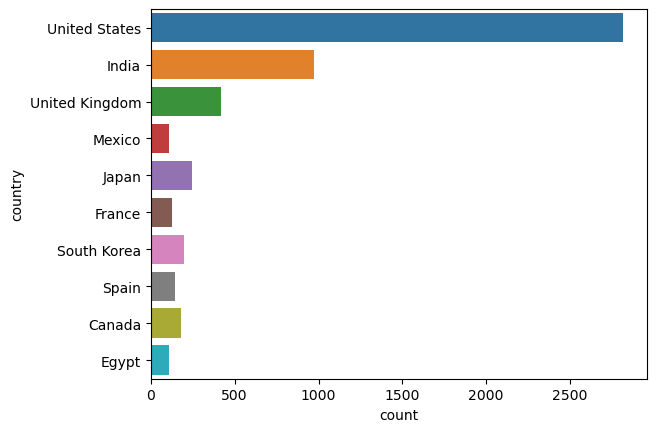

In [27]:
# Plot a countplot of the country variable
sns.countplot(data=df_top_10_countries, y="country")

### 15. Draw a bar graph of the number of movies/series by content rating

<Axes: xlabel='count', ylabel='rating'>

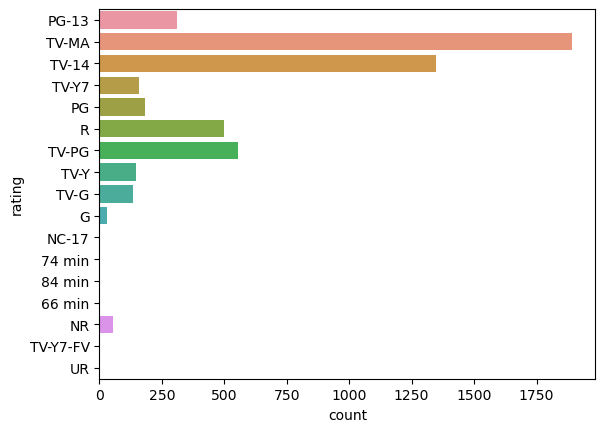

In [28]:
# Plot a countplot of the country variable
sns.countplot(data=df_top_10_countries, y="rating")

### 16. Show the evolution of the number of movies/series available on Netflix over time

In [64]:
# Convert date_added to datetime format
df['date_added'] = pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [65]:
df['year_added'] = df.date_added.dt.year
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


In [70]:
# Group the data by year_added and type, and count the number of entries in each group
grouped_data = df.groupby(['year_added', 'type']).size().reset_index(name='Count')
grouped_data.head()

,year_added,type,Count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13


In [31]:
# Group the data by year_added and type, and count the number of entries in each group
grouped_data = df.groupby(['year_added', 'type']).size().reset_index(name='Count')
grouped_data

,year_added,type,Count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,5
8,2014.0,Movie,19
9,2014.0,TV Show,5


<Axes: xlabel='year_added', ylabel='Count'>

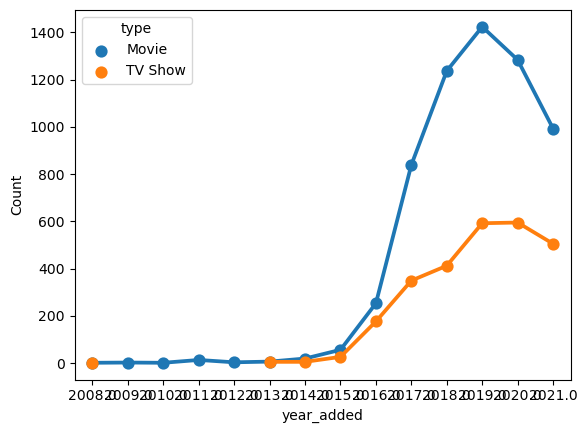

In [32]:
# Plot the pointplot
sns.pointplot(data=grouped_data, x='year_added', y='Count', hue='type')

C:\Users\Brani\AppData\Local\Temp\ipykernel_37080\2018666144.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].fillna('0')
C:\Users\Brani\AppData\Local\Temp\ipykernel_37080\2018666144.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)
C:\Users\Brani\AppData\Local\Temp\ipykernel_37080\2018666144.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

<Axes: xlabel='duration', ylabel='Density'>

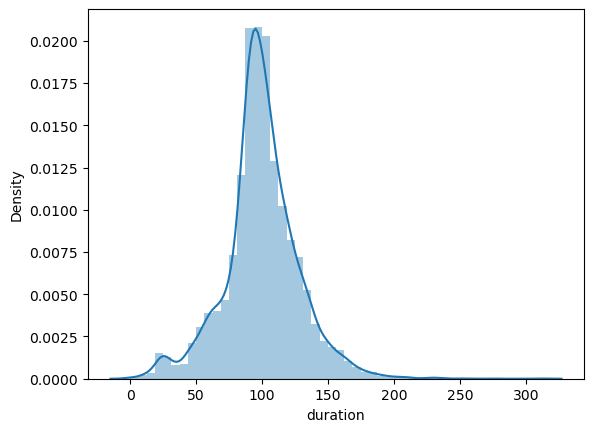

In [33]:
# Select only movies
movies = df[df['type'] == 'Movie']

# Replace missing values with 0
movies['duration'] = movies['duration'].fillna('0')

# Convert duration to integers
movies['duration'] = movies['duration'].str.replace(' min', '').astype(int)

# Plot distribution of movie durations
sns.distplot(movies['duration'])


### 18. Tracer un graphique représentant le nombre de séries par modalité de nombre de saisons

In [39]:
tv_show = df[df.type == 'TV Show']
tv_show = tv_show[tv_show.duration.notna()]
tv_show['duration'] =  tv_show.duration.str.replace('\D+', '').astype(int)
tv_show


C:\Users\Brani\AppData\Local\Temp\ipykernel_37080\407672879.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tv_show['duration'] =  tv_show.duration.str.replace('\D+', '').astype(int)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",2018-05-01,2015,TV-Y7,2,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...,2018.0
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,2017-01-17,2016,TV-PG,2,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves...",2017.0
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",2018-09-13,2016,TV-Y7,3,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...,2018.0
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre...",2016.0


<Axes: xlabel='duration', ylabel='count'>

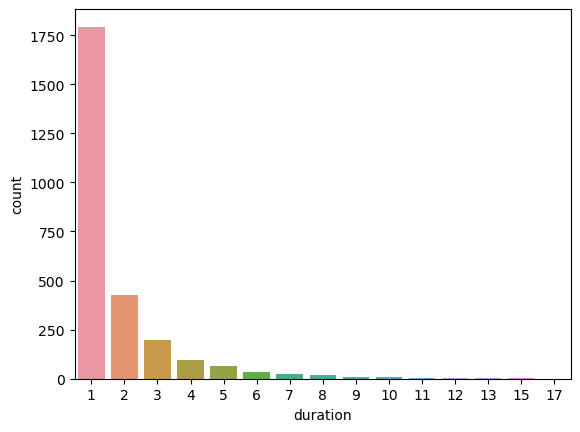

In [41]:
sns.countplot(data=tv_show, x=tv_show.duration) 

In [35]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
